## Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

## Import csv

In [25]:
hp = pd.read_csv('../datasets/happiness_cleaned.csv', index_col = 0)

## Analysis

In [60]:
hp = hp[['Country','Ranking','Happiness_Score','GDP_Capita','Family','Life_Expectancy','Freedom','Generosity','Government_Corruption','Dystopia.Residual']]        

In [61]:
hp.describe()

,Ranking,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Generosity,Government_Corruption,Dystopia.Residual
count,154.000000,154.000000,154.000000,154.000000,153.000000,153.000000,153.000000,153.000000,154.000000
mean,77.500000,5.371299,0.991112,1.196618,0.558425,0.412359,0.248275,0.124360,1.848837
std,44.600075,1.114210,0.414542,0.271590,0.230275,0.146826,0.134143,0.101688,0.501354
min,1.000000,2.905000,0.022643,0.396103,0.005565,0.014996,0.010165,0.004388,0.377914
25%,39.250000,4.519250,0.679481,1.049448,0.397523,0.309410,0.155138,0.059308,1.587952
50%,77.500000,5.286000,1.066948,1.254751,0.613212,0.440306,0.231538,0.089981,1.829808
75%,115.750000,6.103250,1.319453,1.415360,0.726798,0.518631,0.325296,0.153527,2.147727
max,154.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [76]:
# The mean of the Happiness Score is 5.35

### First let's see the top 10 happiest countries according to this dataset:


In [53]:
happiest = hp.groupby("Country").sum().sort_values("Happiness_Score", ascending=False)


In [54]:
top_10 = happiest[0:10]

In [135]:
top_10

,Ranking,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Generosity,Government_Corruption,Dystopia.Residual
Country,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


### Now let's check the 10 countries less happy according to this index:

In [55]:
no_happiest = hp.groupby("Country").sum().sort_values("Happiness_Score")


In [56]:
# we won't take into consideration Central African Republic because 
# has two NaN values on the variables so I don't trust it.
# I'll drop this row:
hp = hp[hp.Country != 'Central African Republic']

In [59]:
botton_10 = no_happiest[0:10]

In [134]:
botton_10

,Ranking,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Generosity,Government_Corruption,Dystopia.Residual
Country,,,,,,,,,
Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286
South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567
Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601


## ((((TABLEAU MAPA)))) done

### What are the variables that conform this index and wich ones are the most important ones

In [86]:
# Family and money are the two variables that affect the most to increase the Happiness Score because are the ones 
# with a higher mean and the Happiness Score is calculated by summing the Scores foe each variable

hp[['GDP_Capita','Family', 'Life_Expectancy','Freedom','Generosity','Government_Corruption','Dystopia.Residual']].describe()


,GDP_Capita,Family,Life_Expectancy,Freedom,Generosity,Government_Corruption,Dystopia.Residual
count,154.000000,154.000000,153.000000,153.000000,153.000000,153.000000,154.000000
mean,0.991112,1.196618,0.558425,0.412359,0.248275,0.124360,1.848837
std,0.414542,0.271590,0.230275,0.146826,0.134143,0.101688,0.501354
min,0.022643,0.396103,0.005565,0.014996,0.010165,0.004388,0.377914
25%,0.679481,1.049448,0.397523,0.309410,0.155138,0.059308,1.587952
50%,1.066948,1.254751,0.613212,0.440306,0.231538,0.089981,1.829808
75%,1.319453,1.415360,0.726798,0.518631,0.325296,0.153527,2.147727
max,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


### Let's see the correlation between variables

In [87]:
hp.corr()

,Ranking,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Generosity,Government_Corruption,Dystopia.Residual
Ranking,1.000000,-0.993970,-0.809302,-0.739723,-0.773499,-0.539737,-0.135755,-0.402777,-0.494419
Happiness_Score,-0.993970,1.000000,0.805470,0.744847,0.771621,0.560005,0.162367,0.428165,0.491247
GDP_Capita,-0.809302,0.805470,1.000000,0.675419,0.838987,0.366835,-0.006884,0.349216,0.031412
Family,-0.739723,0.744847,0.675419,1.000000,0.605873,0.430485,0.064716,0.225062,0.087257
Life_Expectancy,-0.773499,0.771621,0.838987,0.605873,1.000000,0.320745,0.073249,0.286516,0.050387
Freedom,-0.539737,0.560005,0.366835,0.430485,0.320745,1.000000,0.289114,0.495024,0.078412
Generosity,-0.135755,0.162367,-0.006884,0.064716,0.073249,0.289114,1.000000,0.296687,-0.121169
Government_Corruption,-0.402777,0.428165,0.349216,0.225062,0.286516,0.495024,0.296687,1.000000,-0.020360
Dystopia.Residual,-0.494419,0.491247,0.031412,0.087257,0.050387,0.078412,-0.121169,-0.020360,1.000000


#### Happiness_Score / GBP_Capita correlation

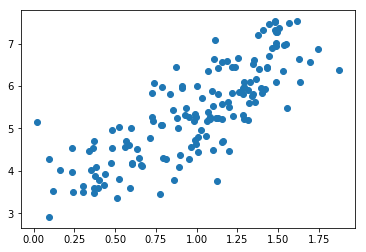

In [131]:
# Esto es la correlación? 
# cómo pongo labebls?

plt.scatter(hp['GDP_Capita'], hp['Happiness_Score'])
plt.show()

# GDP_Capita --> How wealthy is a country

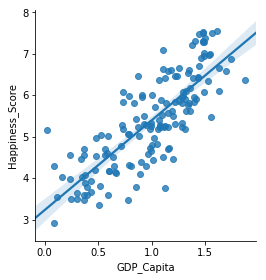

In [143]:
sns.pairplot(hp, x_vars = 'GDP_Capita' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

#### Happiness_Score / Family correlation


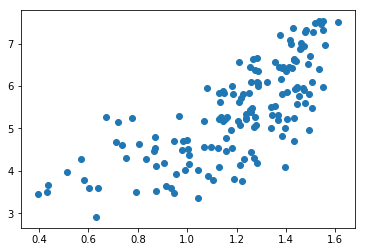

In [117]:
plt.scatter( hp['Family'], hp['Happiness_Score'])
plt.show()

# Family "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need 
# them, or not?" People were only able to answer with a yes or no. A yes would equal 1 and a no would equal 0. 
# The average of all answers results in a single value that represents the amount of social support that is present 
# in a country.

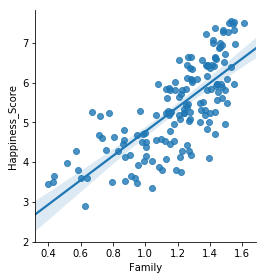

In [144]:
sns.pairplot(hp, x_vars = 'Family' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

#### Happiness_Score / Life_expectancy correlation


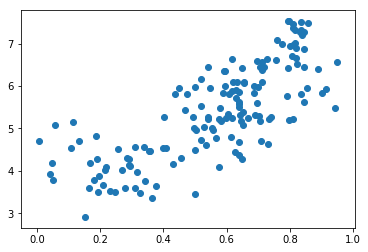

In [119]:
plt.scatter(hp['Life_Expectancy'], hp['Happiness_Score'])
plt.show()

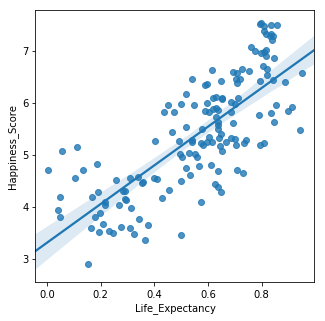

In [161]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.regplot(hp['Life_Expectancy'], hp['Happiness_Score'], scatter = True, ax = ax)

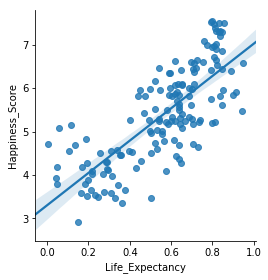

In [145]:
sns.pairplot(hp, x_vars = 'Life_Expectancy' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

In [ ]:
# This data it taken from the Global Health Observatory (GHO), average number of "healthy" years a child at birth 
# is estimated to live.

#### Happiness_Score / Freedom correlation


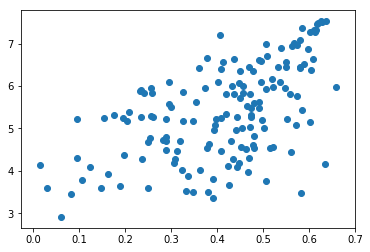

In [133]:
# "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"
plt.scatter( hp['Freedom'],hp['Happiness_Score'])
plt.show()

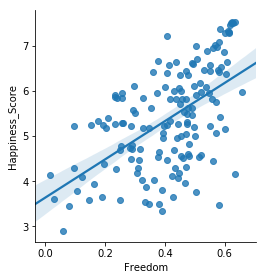

In [147]:
sns.pairplot(hp, x_vars = 'Freedom' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

#### As we can see GDP_Capita is the most correlated followed by Family, Life Expectancy and Freedom where we can still observe a correlation. 

#### Happiness_Score / Generosity correlation


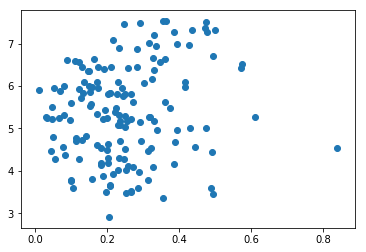

In [122]:
plt.scatter( hp['Generosity'], hp['Happiness_Score'])
plt.show()

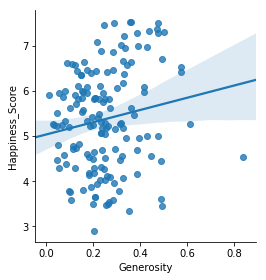

In [146]:
sns.pairplot(hp, x_vars = 'Generosity' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

In [128]:
## Generosity has no correlaction with the Happiness Score. The question to measure if a country was generous or not
## was: "Have you donated money to a charity in the past month?", it would be interesting to use another question to 
## measure the generosity of the country and see how this changes the correlation.

#### Happiness_Score / Government Corruption

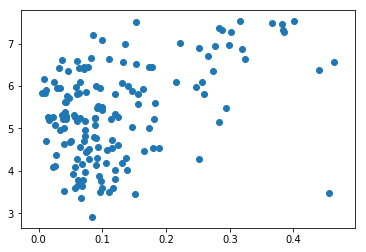

In [129]:
plt.scatter(hp['Government_Corruption'], hp['Happiness_Score'])
plt.show()

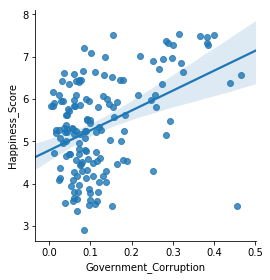

In [148]:
sns.pairplot(hp, x_vars = 'Government_Corruption' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

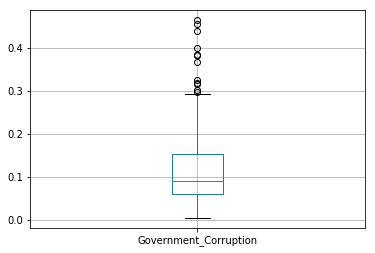

In [126]:
hp.boxplot('Government_Corruption')

In [130]:
# The question was: 'Trust in the government' and as we can see mainly countrys do not trust in their governments. 
### we can observe, there are countries that does not trust in their govern with a high happiness score and countries 
# that do not trust in their governments with low happiness score.

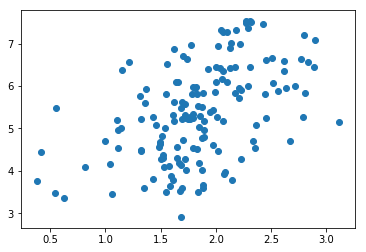

In [124]:
plt.scatter(hp['Dystopia.Residual'], hp['Happiness_Score'])
plt.show()

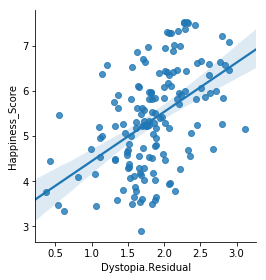

In [149]:
sns.pairplot(hp, x_vars = 'Dystopia.Residual' , y_vars = 'Happiness_Score', size = 4, kind = 'reg')

In [132]:
## Dystopia residual has a moderate correlation, that means that others factors somehow may have some relation 
## with the happiness score but not a strog one.